In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from surprise import Reader
from surprise import KNNWithMeans

import warnings
warnings.filterwarnings('ignore')

 - Compare ItemBased and UserBased knn algorithms on the "ml-100k" data set. Use KNNWithMeans, distance metric pearson for user-based and cosine for item-based.
 - Use 5-fold cross-validation with a fixed random state so that both algorithms have the same training and test data.
 - You do not need to compute both MAE and RMSE, use RMSE only.
 - Using matplotlib, create a box plot of the RMSE distribution across the various folds.


#### USER_BASED with PEARSON

In [2]:
data = Dataset.load_builtin('ml-100k')

cv = KFold(n_splits = 5, random_state = 30)
user = {'name':'pearson_baseline', 'user_based':True}
algo_user = KNNWithMeans(sim_options = user)
rmse_user = []

for trainset, testset in cv.split(data):
#for trainset, testset in pkf.split(data):
    algo_user.fit(trainset)
    pred_user = algo_user.test(testset)
    rmse_user.append(rmse(pred_user))
    rmse(pred_user)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9415
RMSE: 0.9415
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9341
RMSE: 0.9341
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9405
RMSE: 0.9405
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9364
RMSE: 0.9364
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9320
RMSE: 0.9320


In [3]:
rmse_user

[0.941471149133091,
 0.9341179750049265,
 0.9404906950543632,
 0.936371961563906,
 0.9319632634694806]

#### ITEM_BASED with COSINE

In [4]:
item = {'name':'cosine', 'user_based':False}
algo_item = KNNWithMeans(sim_options = item)
rmse_item = []
for trainset, testset in cv.split(data):
    algo_item.fit(trainset)
    pred_item = algo_item.test(testset)
    rmse(pred_item)
    rmse_item.append(rmse(pred_item))    

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9487
RMSE: 0.9487
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9395
RMSE: 0.9395
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9435
RMSE: 0.9435
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9437
RMSE: 0.9437
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9386
RMSE: 0.9386


In [5]:
rmse_item

[0.9486853541017138,
 0.939518889614315,
 0.9435269556107996,
 0.9437424780948772,
 0.9385597125137896]

### Summary

In [6]:
# paired t-test
from scipy import stats
ttest = stats.ttest_rel(rmse_user, rmse_item)
res = []
for i in ttest:
    res.append(i)
# rmse for user and item
name = ['User_based','Item_based']
df = pd.DataFrame([rmse_user, rmse_item], index = name)

### Results

<RMSE for User_based and Item_based>
                   0         1         2         3         4
User_based  0.941471  0.934118  0.940491  0.936372  0.931963
Item_based  0.948685  0.939519  0.943527  0.943742  0.938560

<Significance of the deffience between User_based and Item_based>


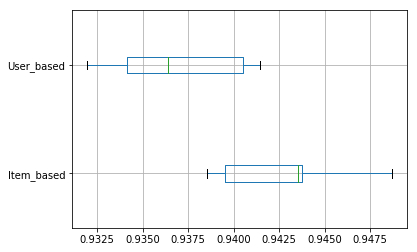


<Paired T-statistics Results>
Paired T-stat -7.398264904912972
Paired P-value 0.0017803393665215658


In [7]:
from termcolor import colored
title1 = colored("<RMSE for User_based and Item_based>", "blue", attrs = ["bold"])
title2 = colored("<Significance of the deffience between User_based and Item_based>", 
                 "blue", attrs = ["bold"])
title3 = colored("<Paired T-statistics Results>", "blue", attrs = ["bold"])
print(title1)
#print colored("RMSE for User_based and Item_based", "blue")
print(df)
print()
print(title2)
results = [rmse_item, rmse_user]
box = pd.DataFrame(results, index = ['Item_based','User_based'])
box.T.boxplot(vert = False)
plt.show()
print()
print(title3)
print("Paired T-stat", res[0])
print("Paired P-value", res[1])
